In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
RRNet_catalog = pd.read_csv("../data/lamost_dr8_medium_star/LAMOST_DR8MRS_SPEMR_parametes_20230212.csv")

In [3]:
RRNet_catalog.columns

Index(['obsid', 'filename', 'ra', 'dec', 'extname_blue', 'extname_red',
       'snr_blue', 'snr_red', 'Teff[K]', 'Teff[K]_err', 'Logg', 'Logg_err',
       'CH', 'CH_err', 'NH', 'NH_err', 'OH', 'OH_err', 'MgH', 'MgH_err', 'AlH',
       'AlH_err', 'SiH', 'SiH_err', 'SH', 'SH_err', 'KH', 'KH_err', 'CaH',
       'CaH_err', 'TiH', 'TiH_err', 'CrH', 'CrH_err', 'MnH', 'MnH_err', 'FeH',
       'FeH_err', 'NiH', 'NiH_err'],
      dtype='object')

In [7]:
RRNet_catalog.columns

Index(['obsid', 'filename', 'ra', 'dec', 'extname_blue', 'extname_red',
       'snr_blue', 'snr_red', 'Teff[K]', 'Teff[K]_err', 'Logg', 'Logg_err',
       'CH', 'CH_err', 'NH', 'NH_err', 'OH', 'OH_err', 'MgH', 'MgH_err', 'AlH',
       'AlH_err', 'SiH', 'SiH_err', 'SH', 'SH_err', 'KH', 'KH_err', 'CaH',
       'CaH_err', 'TiH', 'TiH_err', 'CrH', 'CrH_err', 'MnH', 'MnH_err', 'FeH',
       'FeH_err', 'NiH', 'NiH_err'],
      dtype='object')

In [8]:
RRNet_catalog[['filename', 'extname_blue', 'extname_red']]

,filename,extname_blue,extname_red
0,med-58417-NT223436N263553M01_sp12-101.fits.gz,COADD_B,COADD_R
1,med-58943-TD091555N422558S01_sp02-126.fits.gz,COADD_B,COADD_R
2,med-58943-TD091555N422558S01_sp02-126.fits.gz,B-84877662,R-84877662
3,med-58943-TD091555N422558S01_sp02-126.fits.gz,B-84877685,R-84877685
4,med-58943-TD091555N422558S01_sp02-126.fits.gz,B-84877709,R-84877709
...,...,...,...
4197955,med-59006-HIP94481H272801_sp11-174.fits.gz,B-84968760,R-84968760
4197956,med-58889-HIP34594H192101_sp06-144.fits.gz,COADD_B,COADD_R
4197957,med-58500-TD125617N540558T01_sp01-077.fits.gz,COADD_B,COADD_R
4197958,med-58500-TD125617N540558T01_sp01-077.fits.gz,B-84240338,R-84240338


In [5]:
RRNet_catalog.describe()

,obsid,ra,dec,snr_blue,snr_red,Teff[K],Teff[K]_err,Logg,Logg_err,CH,...,TiH,TiH_err,CrH,CrH_err,MnH,MnH_err,FeH,FeH_err,NiH,NiH_err
count,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,...,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06,4.197960e+06
mean,7.220518e+08,1.442466e+02,3.087712e+01,4.090192e+01,6.852866e+01,5.509386e+03,1.297133e+02,3.805677e+00,1.577762e-01,-1.646575e-01,...,-2.627210e-01,1.527862e-01,-3.087416e-01,1.894706e-01,-1.763085e-01,9.954854e-02,-1.538929e-01,6.843579e-02,-1.459928e-01,7.613886e-02
std,6.845386e+07,9.218441e+01,1.674270e+01,4.034425e+01,6.342660e+01,5.609243e+02,7.375322e+01,6.533312e-01,6.840897e-02,2.254834e-01,...,2.699651e-01,8.344020e-02,2.959124e-01,1.022600e-01,2.956595e-01,5.816931e-02,2.484908e-01,3.557257e-02,2.454540e-01,4.155264e-02
min,5.889020e+08,1.793000e-04,-9.996154e+00,1.000000e+01,1.000000e+01,3.212437e+03,2.998028e+01,-1.311215e-01,4.557789e-02,-2.728180e+00,...,-2.359711e+00,2.908353e-02,-2.121952e+00,3.583866e-02,-2.439883e+00,2.554270e-02,-2.320246e+00,2.864754e-02,-2.423017e+00,2.003561e-02
25%,6.811050e+08,7.340995e+01,1.885821e+01,1.644000e+01,2.936000e+01,4.950002e+03,6.492810e+01,3.209518e+00,1.233365e-01,-2.780126e-01,...,-4.232113e-01,7.648343e-02,-4.813898e-01,1.002300e-01,-3.403886e-01,5.966126e-02,-2.981606e-01,4.825108e-02,-2.818067e-01,4.814425e-02
50%,7.263012e+08,1.290533e+02,3.094091e+01,2.723000e+01,4.780000e+01,5.567306e+03,1.203565e+02,4.092401e+00,1.401056e-01,-1.655450e-01,...,-2.621253e-01,1.416738e-01,-3.047255e-01,1.694268e-01,-1.675928e-01,8.183262e-02,-1.319033e-01,5.746958e-02,-1.486020e-01,6.638659e-02
75%,7.771142e+08,2.041547e+02,4.337716e+01,4.981000e+01,8.418000e+01,5.965637e+03,1.745519e+02,4.290390e+00,1.648121e-01,-4.721196e-02,...,-1.087224e-01,2.148635e-01,-1.339922e-01,2.704589e-01,3.528616e-03,1.195793e-01,1.012620e-02,7.479095e-02,-2.606739e-03,8.895943e-02
max,8.267162e+08,3.599999e+02,8.044320e+01,9.990000e+02,9.990000e+02,7.224052e+03,4.270108e+02,5.049560e+00,7.372599e-01,7.557890e-01,...,7.685252e-01,4.721136e-01,7.781339e-01,5.938954e-01,1.012411e+00,4.619405e-01,7.463699e-01,3.627217e-01,9.186653e-01,3.796671e-01


# Draw teff-log diagram

In [3]:
# Disrupt the order
RRNet_catalog = RRNet_catalog.sample(frac=1)
RRNet_catalog.columns

Index(['obsid', 'filename', 'ra', 'dec', 'extname_blue', 'extname_red',
       'snr_blue', 'snr_red', 'Teff[K]', 'Teff[K]_err', 'Logg', 'Logg_err',
       'CH', 'CH_err', 'NH', 'NH_err', 'OH', 'OH_err', 'MgH', 'MgH_err', 'AlH',
       'AlH_err', 'SiH', 'SiH_err', 'SH', 'SH_err', 'KH', 'KH_err', 'CaH',
       'CaH_err', 'TiH', 'TiH_err', 'CrH', 'CrH_err', 'MnH', 'MnH_err', 'FeH',
       'FeH_err', 'NiH', 'NiH_err'],
      dtype='object')

In [4]:
MIST_data = pd.read_csv('../data/other_data/MIST_iso_7Gyr.csv')

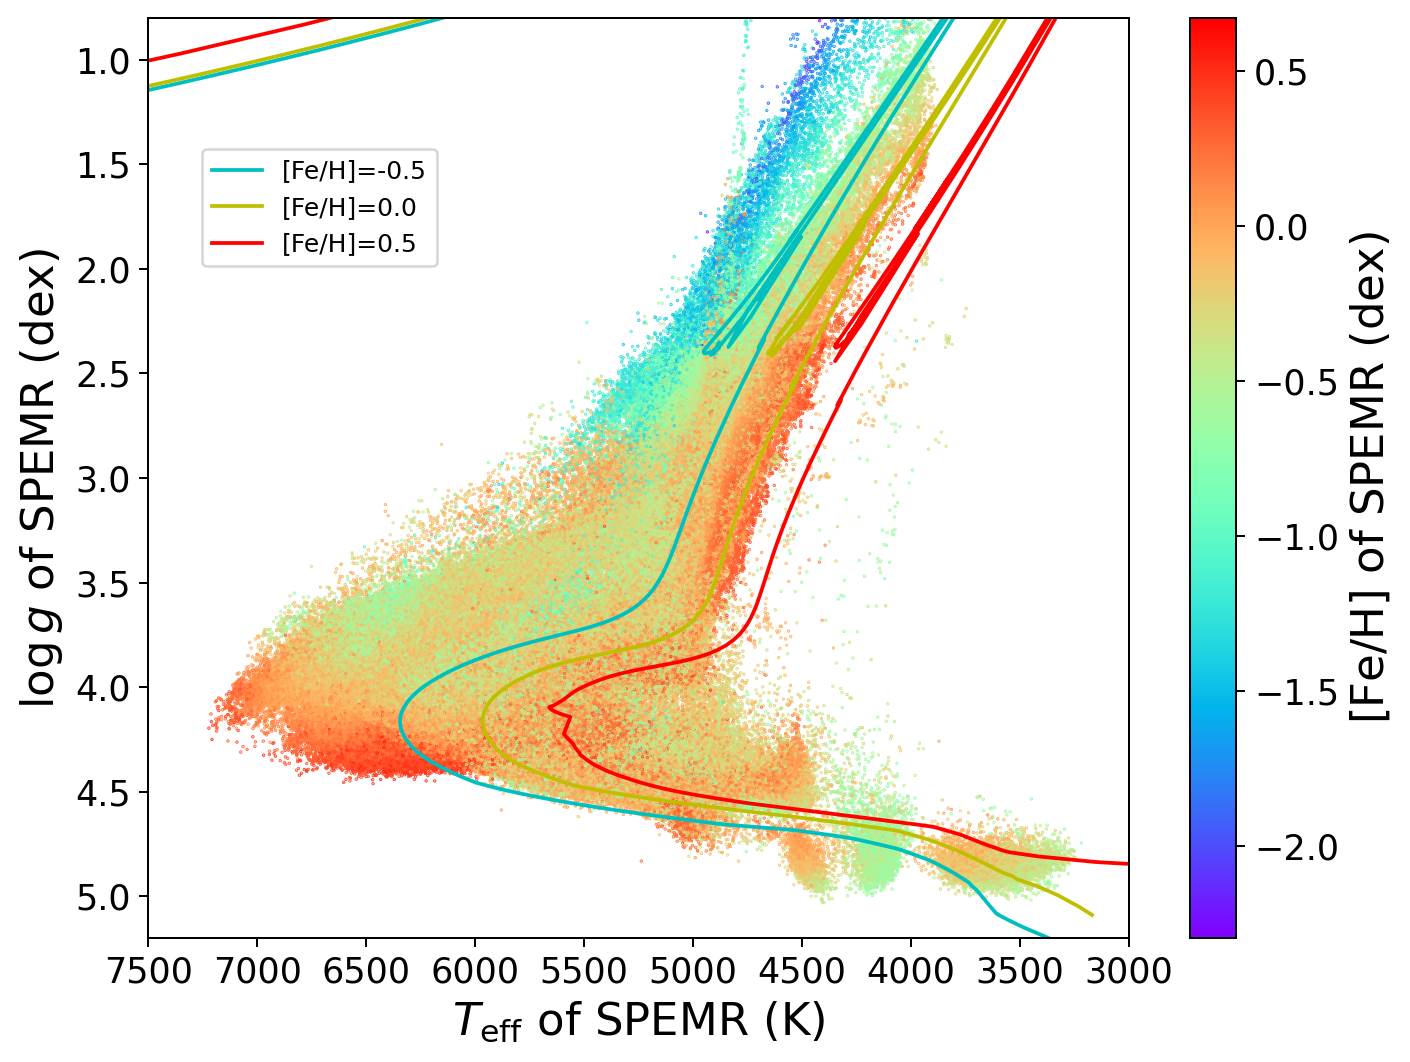

In [5]:
fig = plt.figure(figsize=(8,6),dpi=180)
show_interval = 3

teff = RRNet_catalog['Teff[K]'].values[::show_interval]
logg = RRNet_catalog['Logg'].values[::show_interval]
feh = RRNet_catalog['FeH'].values[::show_interval]

# feh[feh > 0.5] = 0.5
# feh[feh < -1.5] = -1.5

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(teff, 
            logg, 
            c=feh, s=0.1, cmap="rainbow")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14) 
cb.set_label('$\mathrm{[Fe/H]}$ of SPEMR (dex)', fontsize=18)
plt.ylim([5.2,0.8])
plt.xlim([7500,3000])
# plt.clim([-1,0.5])
plt.xlabel('$T_{\mathrm{eff}}$ of SPEMR (K)', fontsize=18)
plt.ylabel('$\log g$ of SPEMR (dex)', fontsize=18)
plt.grid(False) 

plt.plot(10 ** MIST_data['teff_-0.5'], MIST_data['logg_-0.5'], label='[Fe/H]=-0.5', c='c')
plt.plot(10 ** MIST_data['teff_0'], MIST_data['logg_0'], label='[Fe/H]=0.0', c='y')
plt.plot(10 ** MIST_data['teff_0.5'], MIST_data['logg_0.5'], label='[Fe/H]=0.5', c='r')
# plt.legend(loc='center left')
plt.legend(loc=(0.055,0.73))

plt.tight_layout()
# plt.savefig('../images/RRNet_LAMOST_pred_all.pdf')
plt.savefig('../images/SPEMR_LAMOST_pred_all.png')
plt.show()

# Teff-logg plots with different signal-to-noise ratios

NameError: name 'MIST_data' is not defined

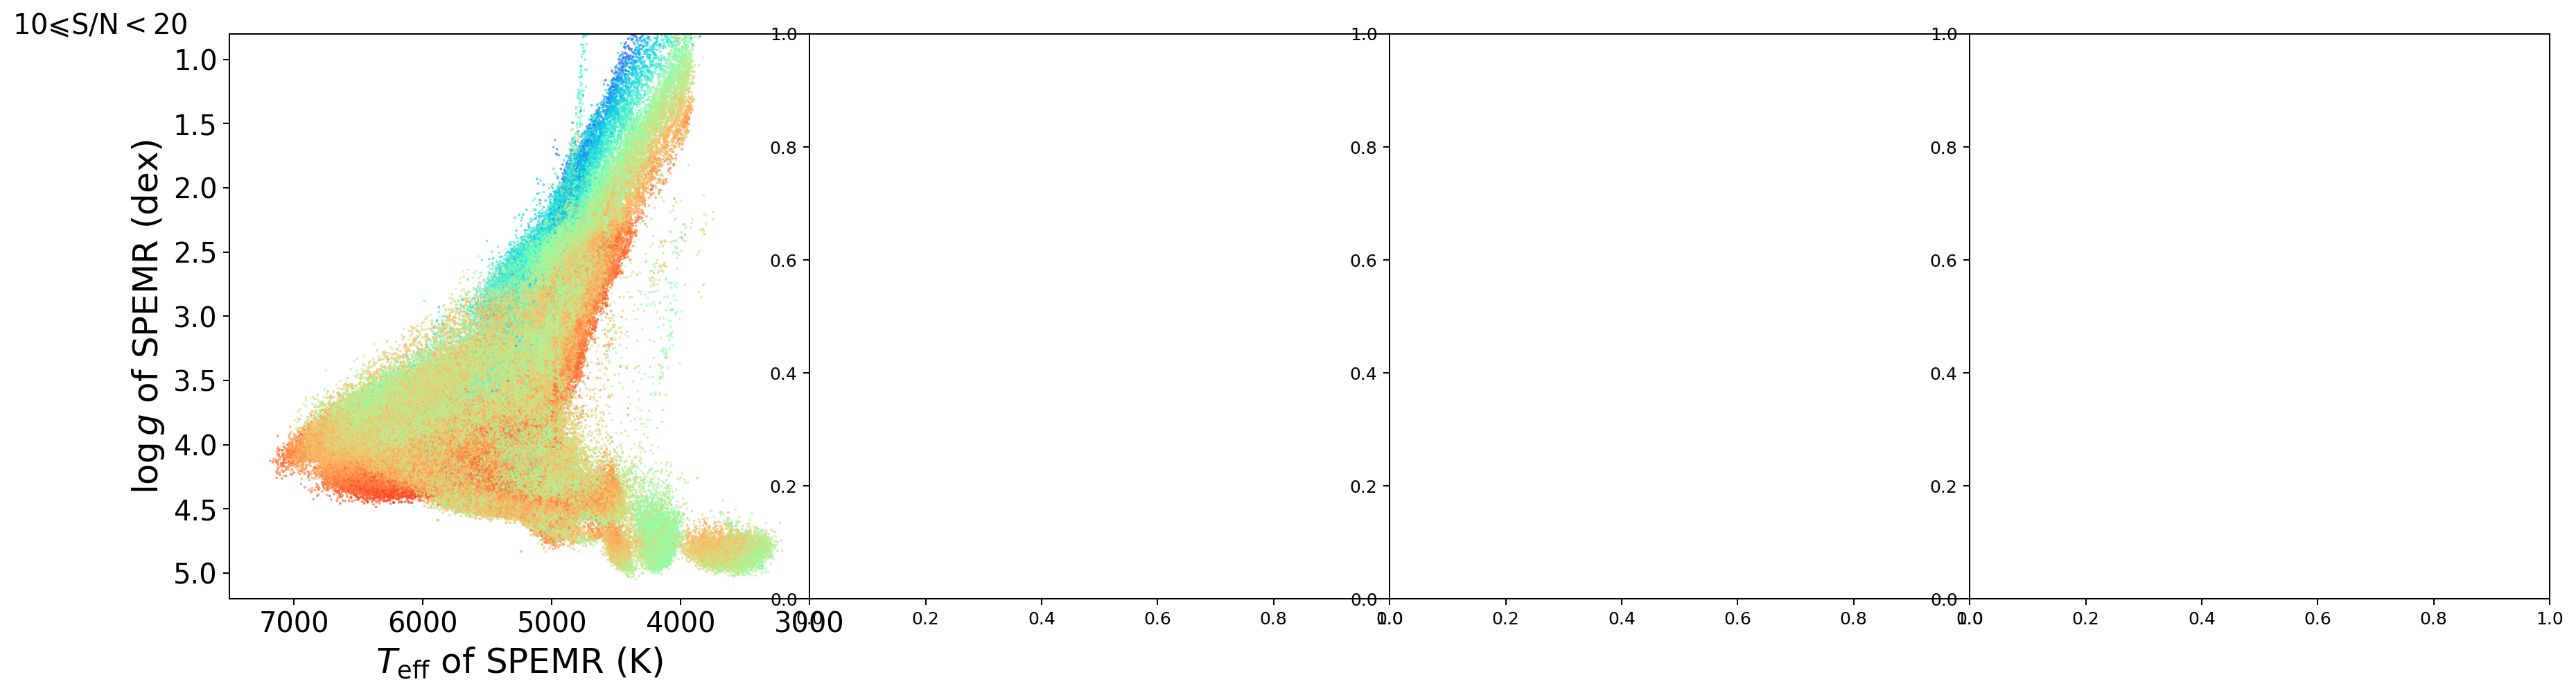

In [3]:
snr_region = [[10, 20], [20, 40], [40, 60], [60, 100]]
show_interval = 1

fig, ax = plt.subplots(1, 4, figsize=(6*4,6), dpi=180)
ax = ax.flatten()
fig.subplots_adjust(wspace=0)

for i in range(4):
    index = np.where(RRNet_catalog['snr_blue'].apply(lambda x: True if x<snr_region[i][1] and x >=snr_region[i][0] else False))[0]
    

    teff = RRNet_catalog['Teff[K]'].iloc[index].values[::show_interval]
    logg = RRNet_catalog['Logg'].iloc[index].values[::show_interval]
    feh = RRNet_catalog['FeH'].iloc[index].values[::show_interval]

#     feh[feh > 0.5] = 0.5
#     feh[feh < -1.5] = -1.5
    
    
    plt.figtext(0.0525+(0.24*i), 0.88, "$%d \leqslant \mathrm{S/N} < %d$"%(snr_region[i][0], snr_region[i][1]),fontsize=16)


    ax[i].tick_params(labelsize=16)
    if i == 0:
        a0 = ax[i].scatter(teff, logg, c=feh, s=0.1, cmap="rainbow")
    else:
        ax[i].scatter(teff, logg, c=feh, s=0.1, cmap="rainbow")

    ax[i].set_ylim([5.2,0.8])
    ax[i].set_xlim([7500,3000])
    # plt.clim([-1,0.5])
    ax[i].set_xlabel('$T_{\mathrm{eff}}$ of SPEMR (K)', fontsize=20)
    if i == 0:
        ax[i].set_ylabel('$\log g$ of SPEMR (dex)', fontsize=20)
    else:
        ax[i].set_yticks([])
        

    ax[i].plot(10 ** MIST_data['teff_-0.5'], MIST_data['logg_-0.5'], label='[Fe/H]=-0.5', c='c')
    ax[i].plot(10 ** MIST_data['teff_0'], MIST_data['logg_0'], label='[Fe/H]=0.0', c='y')
    ax[i].plot(10 ** MIST_data['teff_0.5'], MIST_data['logg_0.5'], label='[Fe/H]=0.5', c='r')
    # plt.legend(loc='center left')
    ax[i].legend(loc=(0.055,0.65), fontsize=16)

    
position=fig.add_axes([0.9995, 0.13, 0.01, 0.85])

cbar = fig.colorbar(a0, ax = ax,cax=position, extend='neither', spacing='proportional', orientation='vertical')
cbar.set_label('$\mathrm{[Fe/H]}$ of SPEMR (dex)', size=20)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
# plt.savefig('../images/RRNet_LAMOST_pred_snr.pdf', bbox_inches='tight')
plt.savefig('../images/SPEMR_LAMOST_pred_snr.png', bbox_inches='tight')
plt.show()

# Uncertainty Analysis

In [4]:
snr_region_list = [[10, 15],[15,20], 
                   [20, 25],[25, 30], 
                   [30, 35], [35, 40],
                   [40, 45],[45,50], 
                   [50, 55],[55, 60], 
                   [60, 65], [65, 70],
                   [70, 75],[75,80], 
                   [80, 85],[85, 90], 
                   [90, 95], [95, 100],
                   [100, 100],
                  ]

label_name_list = ['Teff[K]', 'Logg', 'FeH', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH',
                  'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH']

# Uncertainty in estimation
rrnet_pred_err = RRNet_catalog[["%s_err"%name for name in label_name_list]].values.astype(np.float32)
snr = RRNet_catalog[['snr_blue','snr_red']].min(axis = 1)
errorbar_rrnet_pred = np.zeros((len(snr_region_list), len(label_name_list)))

# Uncertainty of repeated observations
RRNet_catalog["min_snr"] = RRNet_catalog[['snr_blue','snr_red']].min(axis = 1)
gr_count = RRNet_catalog.groupby(by=['obsid']).count()
gr_mean = RRNet_catalog.groupby(by=['obsid']).mean()
gr_std = RRNet_catalog.groupby(by=['obsid']).std()
mean_gr = gr_mean[gr_count['min_snr']>=5][label_name_list].values
std_gr = gr_std[gr_count['min_snr']>=5][label_name_list].values
snr_gr = gr_mean[gr_count['min_snr']>=5]["min_snr"]
errorbar_repeated_observation = np.zeros((len(snr_region_list), len(label_name_list)))


count = 0
for snr_region in tqdm(snr_region_list):
    if snr_region[0] < snr_region[1]:
        snr_index_rrnet_pred = np.where(snr.apply(lambda x: True if x<snr_region[1] and x >=snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x<snr_region[1] and x >=snr_region[0] else False))[0]
    else:
        snr_index_rrnet_pred = np.where(snr.apply(lambda x: True if x >=snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x >=snr_region[0] else False))[0]
    
    err_mean_rrnet_pred = rrnet_pred_err[snr_index_rrnet_pred].mean(axis=0)
    err_mean_repeated_observation = std_gr[snr_index_repeated_observation].mean(axis=0)
    
   
    errorbar_rrnet_pred[count] = err_mean_rrnet_pred
    errorbar_repeated_observation[count] = err_mean_repeated_observation
    count += 1
#     print(snr_region, err_mean_rrnet_pred, err_mean_repeated_observation)

# errorbar_rrnet_pred[:,0] *= 0.001
# errorbar_repeated_observation[:,0] *= 0.001

100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


134.2395477294922
0.16600793600082397
0.07280854135751724
0.08723299950361252
0.18348802626132965
0.10603813827037811
0.07191082835197449
0.09744024276733398
0.07318100333213806
0.10463931411504745
0.12499118596315384
0.08174748718738556
0.1545354574918747
0.19651566445827484
0.10636626929044724
0.08117882907390594


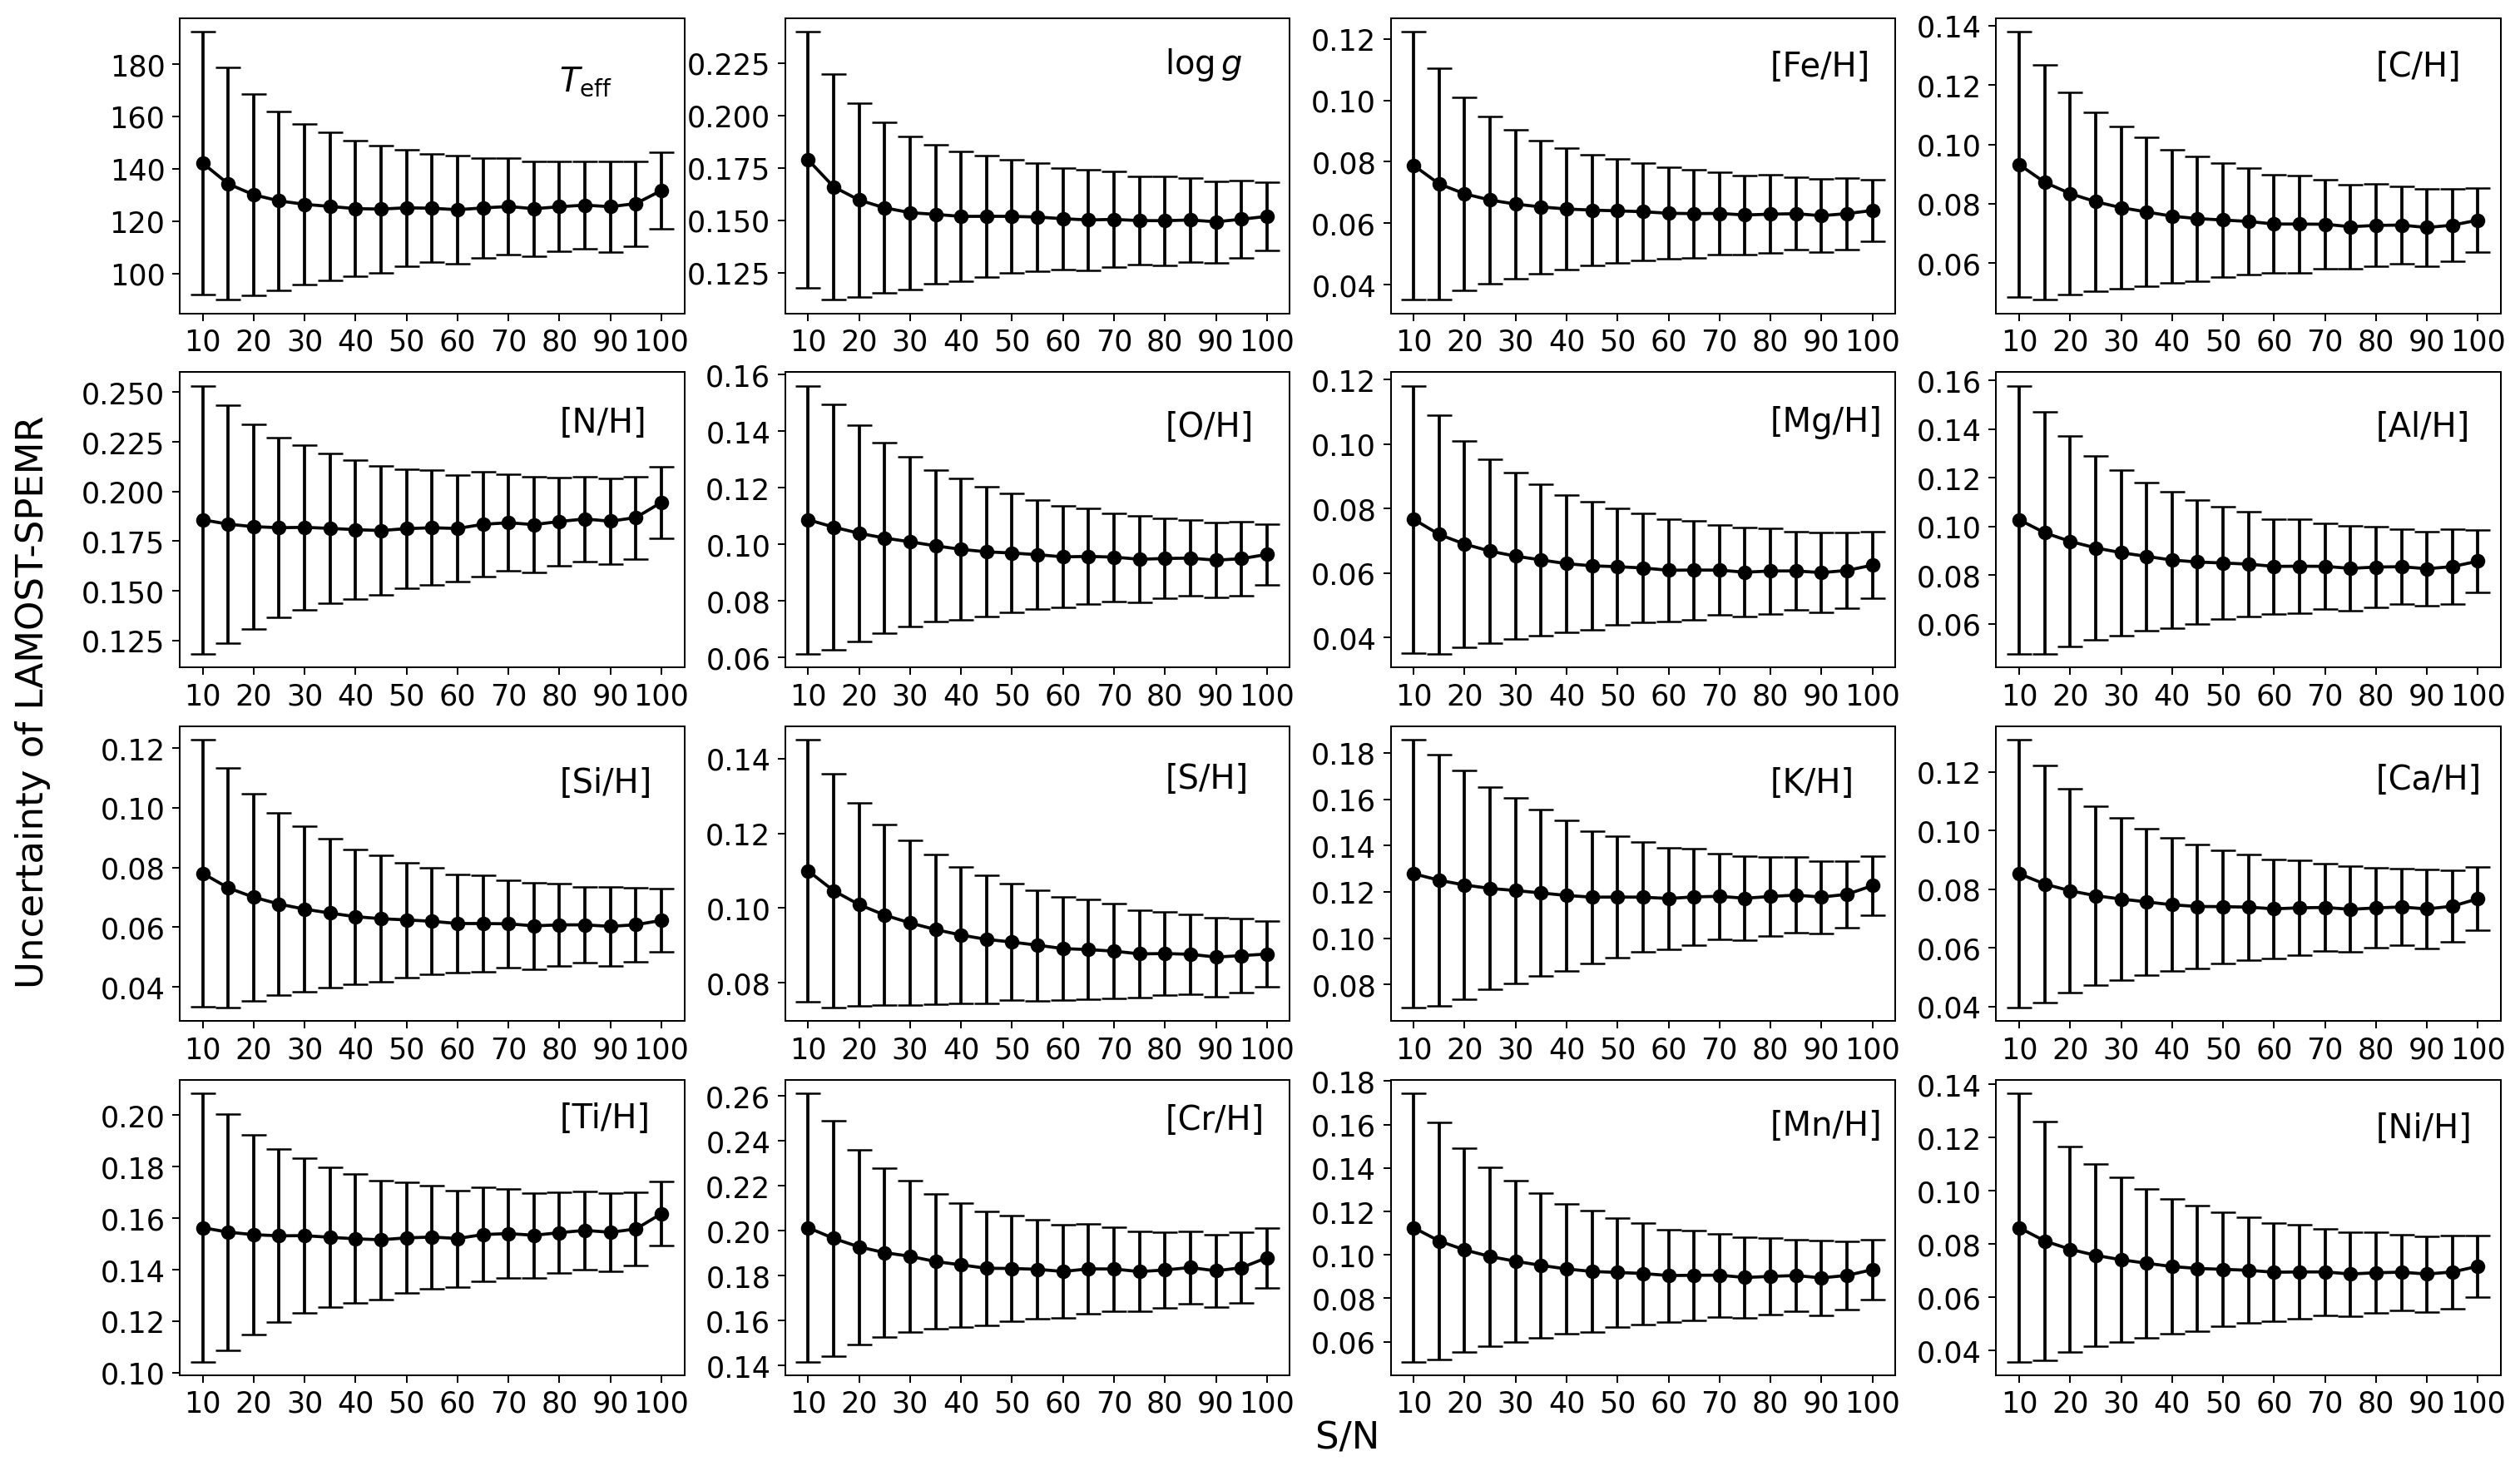

In [6]:
fig = plt.figure(figsize=(20,12),dpi=180)

test_loc_list = [170, 0.22, 0.108, 0.123, 0.23, 0.138, 0.104, 0.137, 0.105, 0.132, 0.163, 0.114, 0.195, 0.245, 0.155, 0.12]

for i in range(len(label_name_list)):
    ax = plt.subplot(4,4,i+1)
    

    plt.errorbar(range(len(snr_region_list)), 
                 errorbar_rrnet_pred[:,i],
                 errorbar_repeated_observation[:,i],
                 color="k",
                      fmt='o-',
                      capsize=6)
    print(errorbar_rrnet_pred[1, i])
    
    plt.xticks([0,2,4,6,8,10,12,14,16,18], 
               [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], size=14)
    plt.yticks(size=14)
    
    if i == 0:
        plt.text(14, test_loc_list[i], "$T_\mathregular{eff}$", size=16)
    elif i == 1:
        plt.text(14, test_loc_list[i], "$\log g$", size=16)
    else:
        plt.text(14, test_loc_list[i], "[%s/H]"%label_name_list[i][:-1], size=16)


fig.supxlabel("S/N", size=18, position=(0.515,0.08,1))
fig.supylabel("Uncertainty of LAMOST-SPEMR", size=18, position=(0.07,0.5,1))

plt.savefig('../images/uncertainties_analysis_snr.png', bbox_inches='tight')
plt.savefig('../images/uncertainties_analysis_snr.pdf', bbox_inches='tight')
plt.show()